In [5]:
## Preloads
using Statistics
using FFTW
using Plots
using BenchmarkTools
using Profile
using LinearAlgebra
using Measures
using HDF5

In [6]:
push!(LOAD_PATH, "/Users/saydjari/Dropbox/GradSchool_AKS/Doug/Projects/DHC/")
using DHC_2DUtils

In [49]:
rand_mat = h5read("/Users/saydjari/Dropbox/GradSchool_AKS/Doug/ZenodoRepos/WST_old/Data/rand11.h5", "data")

16×16 Array{Float64,2}:
 0.417022     0.417305   0.95789    …  0.926181   0.344737   0.315245
 0.720324     0.55869    0.533165      0.918733   0.940107   0.892889
 0.000114375  0.140387   0.691877      0.394876   0.582014   0.577857
 0.302333     0.198101   0.315516      0.963263   0.878832   0.18401
 0.146756     0.800745   0.686501      0.173956   0.844734   0.787929
 0.0923386    0.968262   0.834626   …  0.12633    0.905392   0.612031
 0.18626      0.313424   0.0182883     0.135079   0.45988    0.0539093
 0.345561     0.692323   0.750144      0.505662   0.546347   0.420194
 0.396767     0.876389   0.988861      0.0215248  0.798604   0.679069
 0.538817     0.894607   0.748166      0.94797    0.285719   0.918602
 0.419195     0.0850442  0.280444   …  0.827115   0.490254   0.000402025
 0.68522      0.0390548  0.789279      0.015019   0.59911    0.976759
 0.204452     0.16983    0.103226      0.176196   0.0155333  0.37658
 0.878117     0.878143   0.447894      0.332064   0.593481   0.9

In [7]:
filter_hash = fink_filter_hash(1,256,nx=16,wd=2)

Dict{Any,Any} with 9 entries:
  "theta_value" => [0.0, 0.0122718, 0.0245437, 0.0368155, 0.0490874, 0.0613592,…
  "pc"          => 1
  "filt_index"  => Array{CartesianIndex{2},1}[[CartesianIndex(1, 4), CartesianI…
  "filt_value"  => [[0.794909, 1.0, 0.874844, 0.606729, 0.298009], [1.0, 0.6067…
  "npix"        => 16
  "psi_index"   => Int32[1 3 … 509 511; 2 4 … 510 512]
  "phi_index"   => 513
  "wd"          => 2
  "j_value"     => [1.0, 2.0]

In [78]:
temp = DHC_compute(rand_mat,filter_hash)

263684-element Array{Any,1}:
 0.5011664709937996
 0.09380343032848318
 0.012250100591765522
 0.008018764568623467
 0.006125050295882796
 0.004009382284311756
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 ⋮
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.00599389912011166
 0.004009359491397353
 0.002922912083277629

In [51]:
reshape_temp = reshape(temp[516:end],513,513)

513×513 Array{Any,2}:
 7.32934e-6   0.000123177  …  3.66467e-6   6.15883e-5  0.0119878
 4.91377e-11  2.27438e-8      2.45689e-11  1.13719e-8  0.00801872
 3.66467e-6   6.15883e-5      1.83234e-6   3.07942e-5  0.0059939
 2.45689e-11  1.13719e-8      1.22844e-11  5.68594e-9  0.00400936
 0.0          0.0             0.0          0.0         0.0
 0.0          0.0          …  0.0          0.0         0.0
 0.0          0.0             0.0          0.0         0.0
 0.0          0.0             0.0          0.0         0.0
 0.0          0.0             0.0          0.0         0.0
 0.0          0.0             0.0          0.0         0.0
 0.0          0.0          …  0.0          0.0         0.0
 0.0          0.0             0.0          0.0         0.0
 0.0          0.0             0.0          0.0         0.0
 ⋮                         ⋱  ⋮                        
 0.0          0.0             0.0          0.0         0.0
 0.0          0.0             0.0          0.0         0.0
 0.0       

In [52]:
theme(:juno)

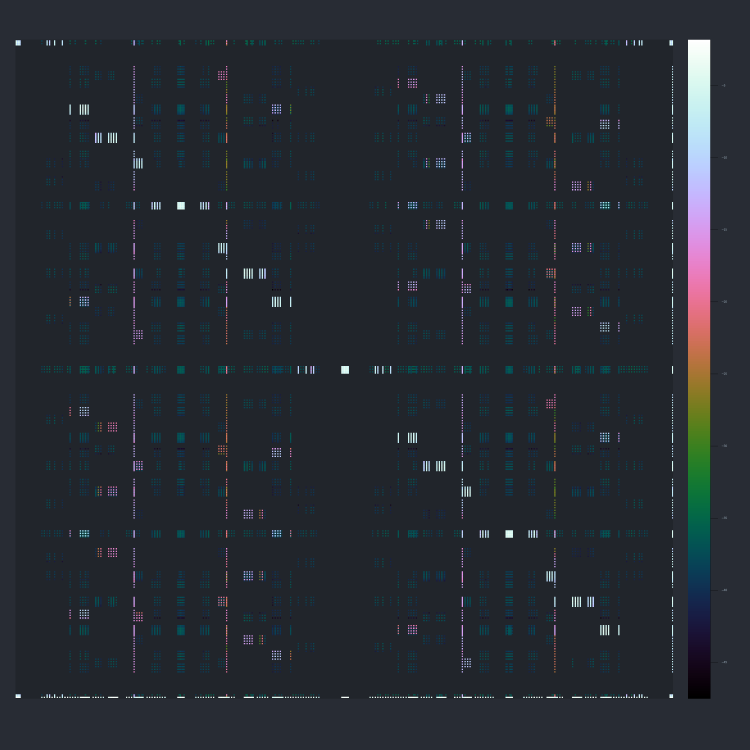

In [53]:
heatmap(log10.(reshape_temp'),
    yaxis=(:flip),
    aspect_ratio=1,
    #axis=nothing,
    border=:none,
    c=:cubehelix,
    #legend = :none,
    margin=0mm,
    size = (3000, 3000))

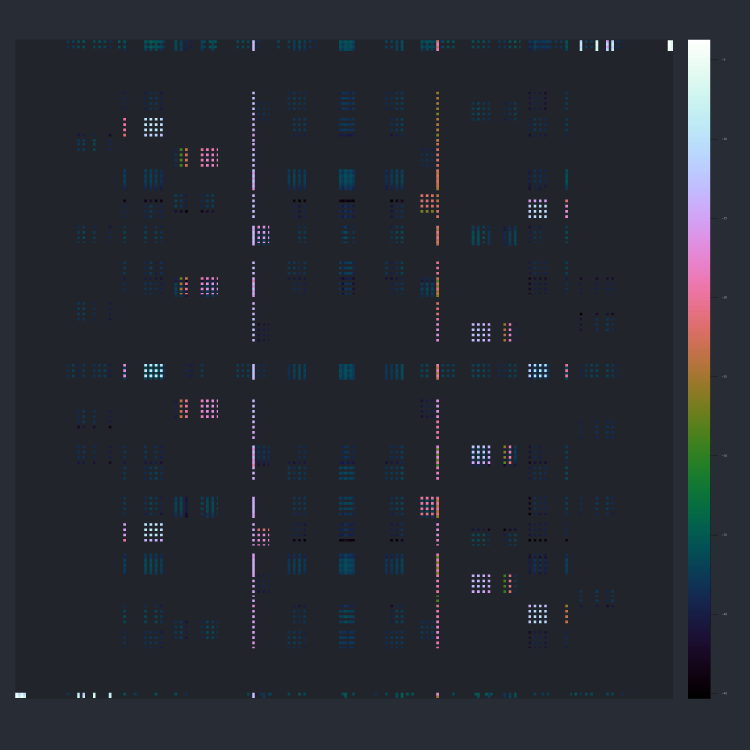

In [54]:
heatmap(log10.(reshape_temp[1:256,257:512]'),
    yaxis=(:flip),
    aspect_ratio=1,
    #axis=nothing,
    border=:none,
    c=:cubehelix,
    #legend = :none,
    margin=0mm,
    size = (3000, 3000))

In [86]:
smooth_mat = h5read("/Users/saydjari/Dropbox/GradSchool_AKS/Doug/ZenodoRepos/WST_old/Data/SFD11.h5", "data");

In [87]:
s_temp = DHC_compute(convert(Array{Float64,2},smooth_mat),filter_hash);
reshape_s_temp = reshape(s_temp[516:end],513,513);

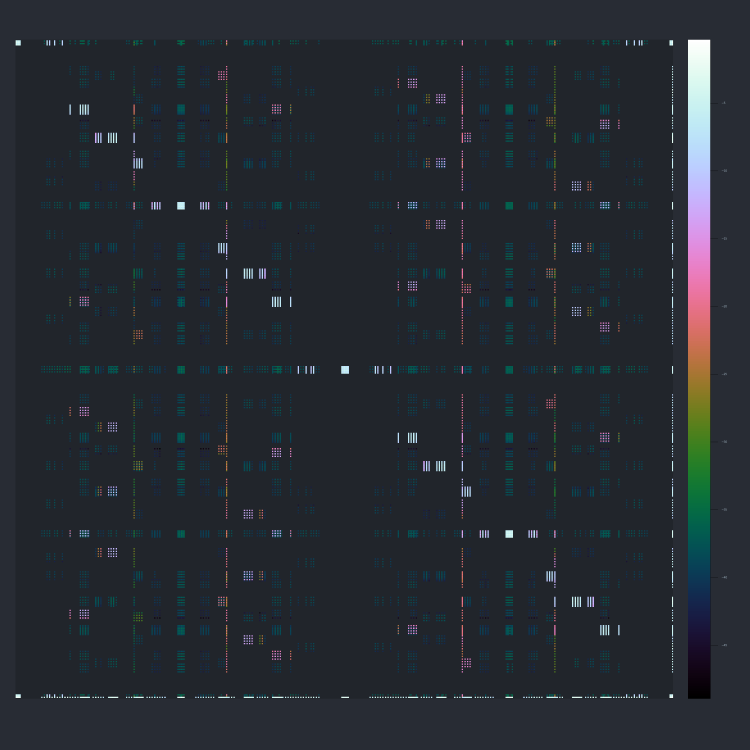

In [88]:
heatmap(log10.(reshape_s_temp'),
    yaxis=(:flip),
    aspect_ratio=1,
    #axis=nothing,
    border=:none,
    c=:cubehelix,
    #legend = :none,
    margin=0mm,
    size = (3000, 3000))

In [110]:
Plots.scalefontsizes(1/2)

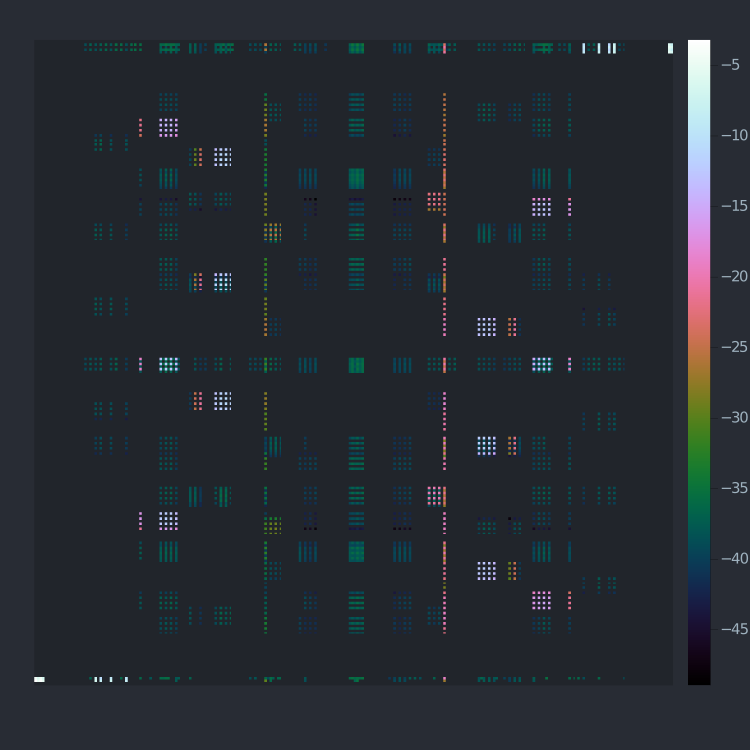

In [111]:
heatmap(log10.(reshape_s_temp[1:256,257:512]'),
    yaxis=(:flip),
    aspect_ratio=1,
    #axis=nothing,
    border=:none,
    c=:cubehelix,
    #legend = :none,
    margin=0mm,
    size = (3000, 3000))

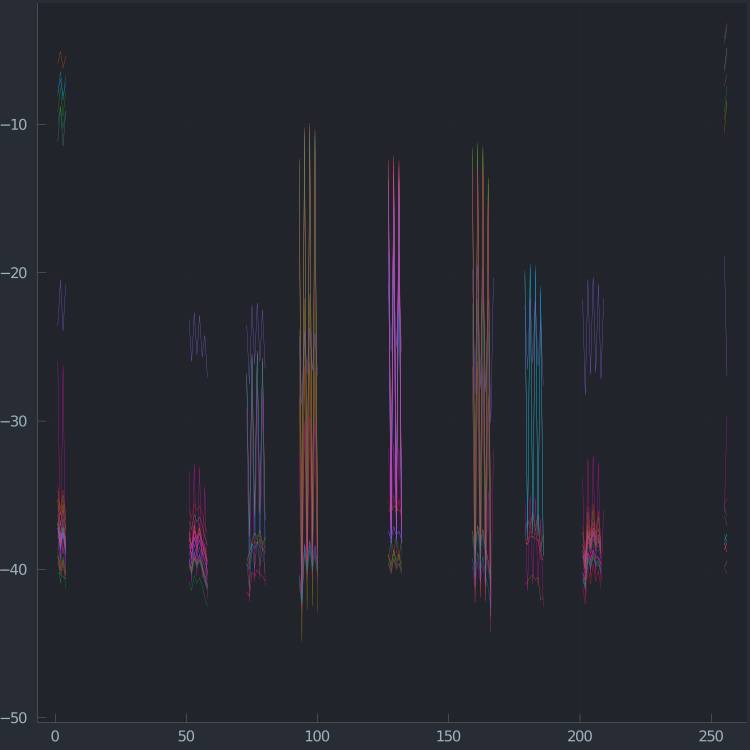

In [115]:
plot(log10.(reshape_s_temp[1:256,257:512]'),
    legend = :none,
    size = (3000, 3000))

In [103]:
minimum(dropdims(log10.(reshape_s_temp[1:256,20]'),dims=1))

-Inf